<a href="https://colab.research.google.com/github/Chromatina/su-mt4007/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(100)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

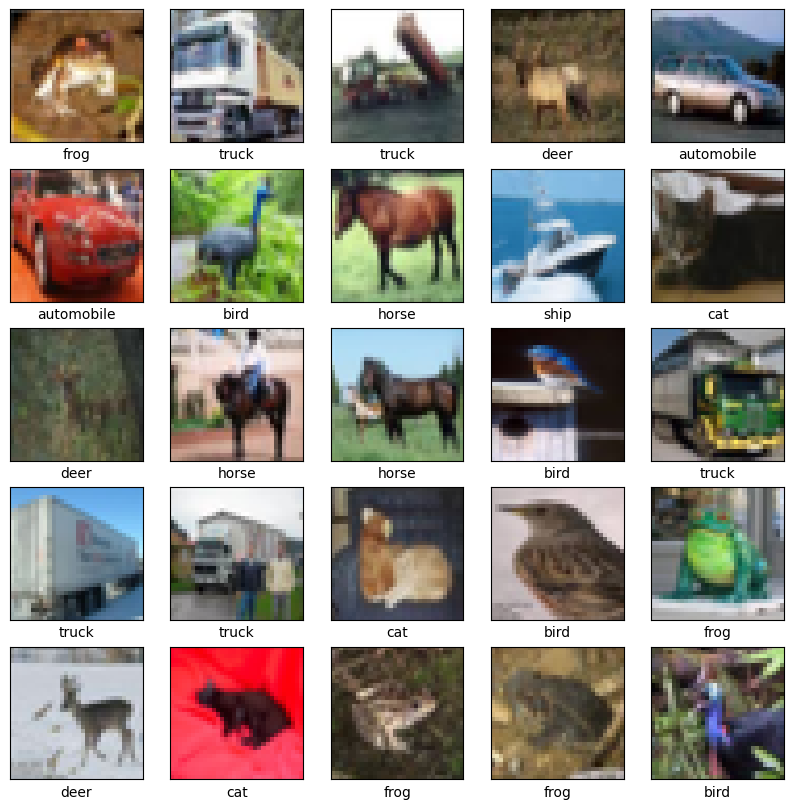

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3495 - loss: 1.7546 - val_accuracy: 0.5330 - val_loss: 1.3039
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.5641 - loss: 1.2203 - val_accuracy: 0.6158 - val_loss: 1.0947
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6309 - loss: 1.0524 - val_accuracy: 0.6472 - val_loss: 1.0222
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6642 - loss: 0.9477 - val_accuracy: 0.6608 - val_loss: 0.9805
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6942 - loss: 0.8692 - val_accuracy: 0.6868 - val_loss: 0.9095
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7120 - loss: 0.8094 - val_accuracy: 0.6921 - val_loss: 0.9172
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7320 - loss: 0.7592 - val_accuracy: 0.6826 - val_loss: 0.9385
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 47ms/step - accuracy: 0.7461 -

313/313 - 3s - 11ms/step - accuracy: 0.6707 - loss: 1.3806


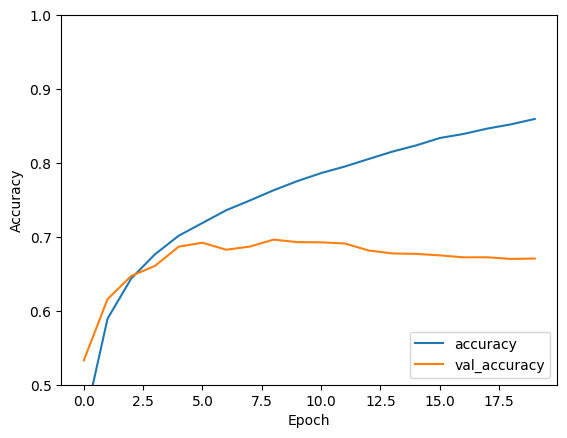

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

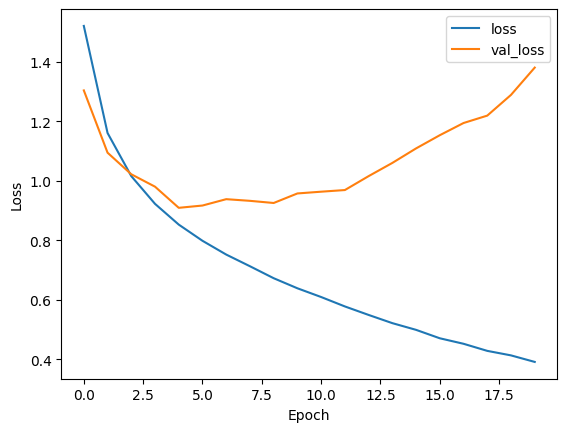

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(test_acc)

0.6707000136375427


# Task 2

In [ ]:
model_tanh = models.Sequential()
model_tanh.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model_tanh.add(layers.MaxPooling2D((2, 2)))
model_tanh.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model_tanh.add(layers.MaxPooling2D((2, 2)))
model_tanh.add(layers.Conv2D(64, (3, 3), activation='tanh'))

In [ ]:
model_tanh.add(layers.Flatten())
model_tanh.add(layers.Dense(64, activation='tanh'))
model_tanh.add(layers.Dense(10))

In [ ]:
model_tanh.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_tanh = model_tanh.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.4031 - loss: 1.6429 - val_accuracy: 0.5876 - val_loss: 1.1839
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5863 - loss: 1.1730 - val_accuracy: 0.6177 - val_loss: 1.1198
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6301 - loss: 1.0581 - val_accuracy: 0.6342 - val_loss: 1.0625
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6611 - loss: 0.9748 - val_accuracy: 0.6534 - val_loss: 1.0169
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6843 - loss: 0.9134 - val_accuracy: 0.6413 - val_loss: 1.0619
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6977 - loss: 0.8693 - val_accuracy: 0.6549 - val_loss: 1.0082
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7116 - loss: 0.8270 - val_accuracy: 0.6587 - val_loss: 1.0112
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7254 -

313/313 - 3s - 11ms/step - accuracy: 0.6431 - loss: 1.2777


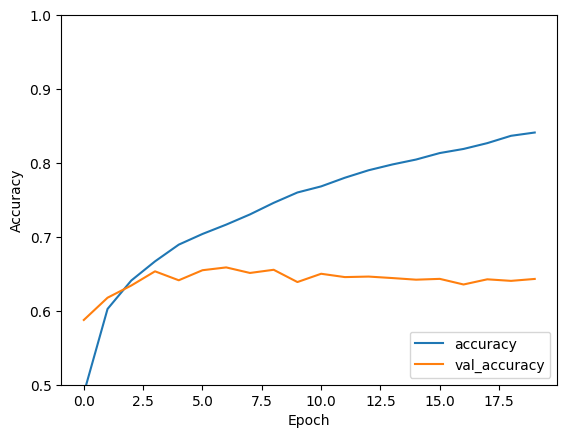

In [ ]:
plt.plot(history_tanh.history['accuracy'], label='accuracy')
plt.plot(history_tanh.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_tanh, test_acc_tanh = model_tanh.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc_tanh)

0.6431000232696533


If we compare the test accuracy between the two models, we see that they are both very close, although the test accuracy using ReLU is slightly higher than when using the tanh activation function. One reason for this is that tanh has the problem of vanishing gradients, where the gradient of the function at very large or very small negative values becomes almost zero which means that there is no gradient flow to the network and the earlier layers stop learning. Due to this ReLU often reaches its peak accuracy in less epochs than tanh. Another reason is that the calculations involving tanh requires the computer to calculate exponents which are much more computationally expensive than the calculations surrounding the ReLU function. Because of this, each epoch finishes faster which means that we can train the model longer and reach a conclusion much faster.

# Task 3

The inputs to our network is the shape (32, 32, 3) which means that each image is 32 pixels wide and 32 pixels tall and that each image has 3 channels, R, G and B. When we add our first convolutional layer with the line
```
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
```
we run a filter with size 3x3(x3) (we do not specify it in the code but each filter needs to have its depth equal to the number of channels) over the images which condenses them to 30x30 pixels since the filter can not center itself on the outer edges of the images without "falling off". Because of this and because the filter moves one pixel at a time by default (the stride of Conv2D is defaulted to 1), the output image (feature map) is 30x30 pixels. When we defined our first convolutional layer we also specified the number of channels we wanted the output to have, namely 32 and this means that the computer creates 32 different 3x3x3 filters with different weights and biases that all go over the images. When we apply a convolutional layer a second time
```
model.add(layers.Conv2D(64, (3, 3), activation='relu')),
```
we again use a filter that is 3x3 pixels, although this time the depth of the filter equals the number of channels the previous layer output, which is 32 from this line
```
model.add(layers.MaxPooling2D((2, 2))).
```
It is worth noting that the maxpooling layer never changed the number of channels, but outputted the same number that the first convolutional layer outputted. When applying our second convolutional layer we set the number of channels the output should have to 64 which means that the computer is creating 64 different filters of size 3x3x32 and running those across the feature maps that are now of the size 15x15x32.

# Task 4

In [ ]:
model_bn = models.Sequential()
model_bn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_bn.add(layers.BatchNormalization())
model_bn.add(layers.MaxPooling2D((2, 2)))
model_bn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_bn.add(layers.BatchNormalization())
model_bn.add(layers.MaxPooling2D((2, 2)))
model_bn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_bn.add(layers.BatchNormalization())
model_bn.add(layers.Flatten())
model_bn.add(layers.Dense(64, activation='relu'))
model_bn.add(layers.BatchNormalization())
model_bn.add(layers.Dense(10))

In [ ]:
model_bn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_bn = model_bn.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 62ms/step - accuracy: 0.4506 - loss: 1.5623 - val_accuracy: 0.5705 - val_loss: 1.2025
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.6371 - loss: 1.0242 - val_accuracy: 0.6215 - val_loss: 1.1100
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7032 - loss: 0.8522 - val_accuracy: 0.6254 - val_loss: 1.1017
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 67ms/step - accuracy: 0.7444 - loss: 0.7334 - val_accuracy: 0.6302 - val_loss: 1.1384
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 67ms/step - accuracy: 0.7804 - loss: 0.6294 - val_accuracy: 0.6619 - val_loss: 1.0531
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.8122 - loss: 0.5428 - val_accuracy: 0.6403 - val_loss: 1.1586
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 67ms/step - accuracy: 0.8402 - loss: 0.4690 - val_accuracy: 0.6553 - val_loss: 1.1922
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - accuracy: 0.

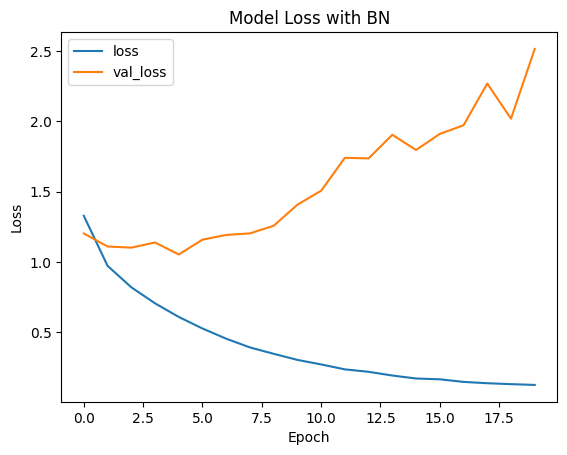

In [ ]:
plt.plot(history_bn.history['loss'], label='loss')
plt.plot(history_bn.history['val_loss'], label='val_loss')
plt.title('Model Loss with BN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

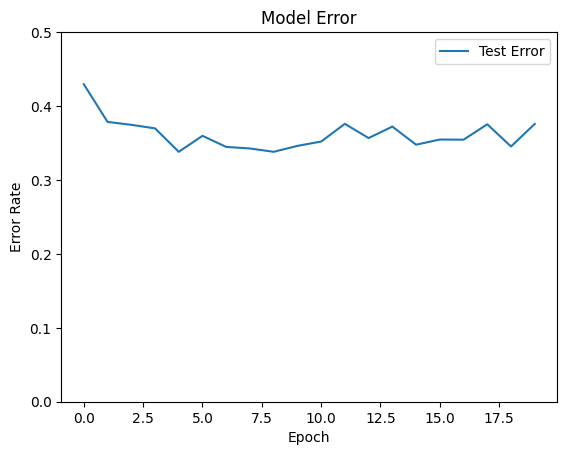

In [ ]:
test_error = [1 - x for x in history_bn.history['val_accuracy']]
plt.plot(test_error, label='Test Error')
plt.title('Model Error')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

If we compare the loss between the model without batch normalization (Task 1) and with batch normalization (Task 4) we see that the point of overfitting starts quite a few epochs earlier for the model with BN (we notice the u-shape in the loss plot). This is mostly because BN smooths out the loss-landscape that the model is traversing. This means that the model has an easier time finding a good minimum and hence starts memorizing the features of the data instead of generalizing. The training loss for both the models behave rather similarly; an exponential decrease where the training loss for the model with BN decreases at a faster rate. If we look at the test error on both models we see that the average error during the 20 epochs for the model without BN is around 0.33 (= 1-0.67), if we do not consider the starting accuracy. The error for the model with BN is also around that number although a tiny bit higher. So in conclusion, BN seems to lower the training loss but also increase the validation loss rather quickly compared to the model without BN since the model has an easier time finding a minimum. We also found that the test error is relatively the same between the models. From all of the above, we can conclude that BN do increase the models performance, although regularization techniques such as dropout and data augmentation are necessary to help the model generalize. This slight increase in performance when using BN could be because BN normalizes the activations to each layer per batch to have a mean of approximately zero and a standard deviation of approximately one. This stabilizes these activations which results in a smoother loss landscape and therefore it is easier for the model to converge to a lower minimum. BN also reduces vanishing and exploding gradients which helps the model stay in the sweet spot, in other words regions where the gradients are not saturated, in the activation function which results in faster and more efficient convergence.

# Task 5

In [ ]:
np.random.seed(42)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal", seed=42),
  layers.RandomRotation(0.1, seed=42),
  layers.RandomZoom(0.1, seed=42),
])

model_aug = models.Sequential()
model_aug.add(data_augmentation)
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(64, activation='relu'))
model_aug.add(layers.Dense(10))

In [ ]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_aug = model_aug.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.3139 - loss: 1.8395 - val_accuracy: 0.4691 - val_loss: 1.4540
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4821 - loss: 1.4306 - val_accuracy: 0.5247 - val_loss: 1.3617
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5361 - loss: 1.3033 - val_accuracy: 0.5742 - val_loss: 1.2241
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.5654 - loss: 1.2211 - val_accuracy: 0.5982 - val_loss: 1.1568
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5890 - loss: 1.1552 - val_accuracy: 0.6237 - val_loss: 1.0946
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6090 - loss: 1.1101 - val_accuracy: 0.6405 - val_loss: 1.0359
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.6183 - loss: 1.0777 - val_accuracy: 0.6385 - val_loss: 1.0524
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6260 -

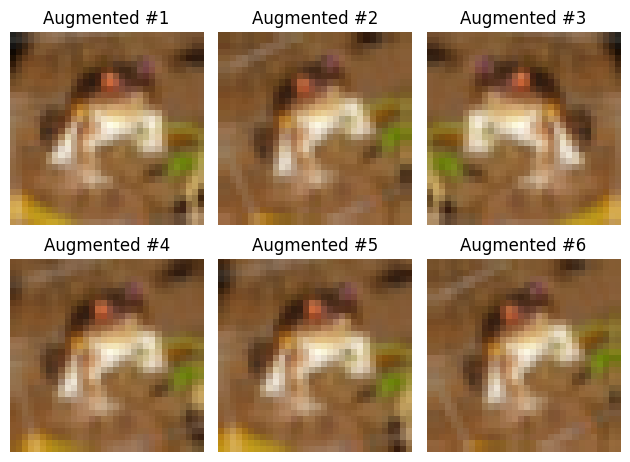

In [ ]:
# Showcases 6 augmented images
for i in range(6):
    augmented_image = data_augmentation(tf.expand_dims(train_images[0], 0), training=True)
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image[0].numpy())
    plt.title(f"Augmented #{i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

When we apply data augmentation to our training set we essentially increase the effective dataset size. This forces the model to learn the class-specific features of the images instead of memorizing the exact locations of the pixels, since overfitting usually occurs with smaller datasets. Furthermore, without data augmentation, the model might only learn spurious correlations, for example it might only recognize images of trucks because they are facing right or on top of asphalt. Data augmentation forces the model to develop invariance to rotations, reflections and scale, ensuring it recognizes a truck no matter its position in the frame. With data augmentation techniques such as flipping and cropping, the model will need to learn the features of the truck instead of the surroundings and its orientation. Furthermore, data augmentation acts as a regularizer, by introducing random transformations during training it creates variability which in turn helps the model generalize. Lastly, since objects in the real world appear in many different locations and angles, these techniques help the model generalize to applications in the real world.

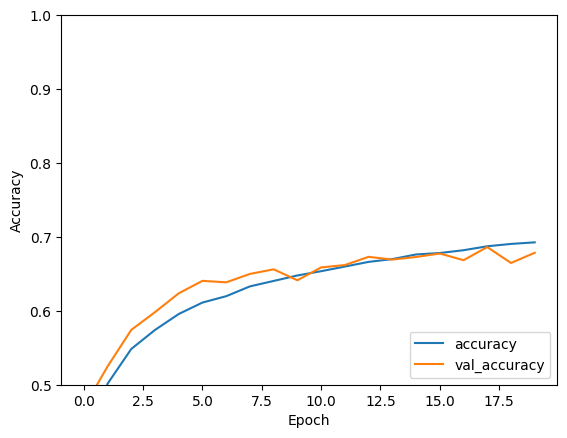

In [ ]:
plt.plot(history_aug.history['accuracy'], label='accuracy')
plt.plot(history_aug.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

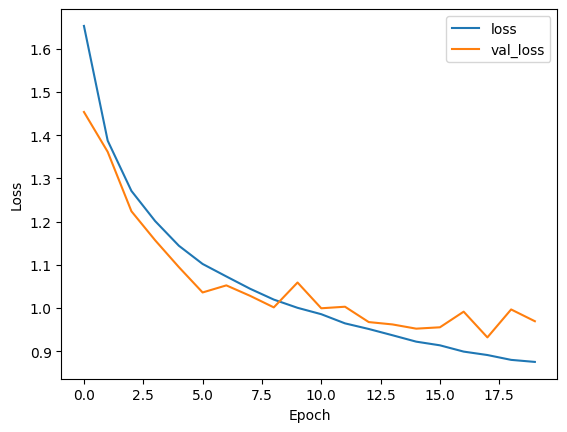

In [ ]:
plt.plot(history_aug.history['loss'], label='loss')
plt.plot(history_aug.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

If we look at the test accuracy on the model with augmentation, we see that it still has not settled at the end of our 20 epochs. This suggests that we have not yet reached the maximum potential of our model which is supported by the loss plot that shows the validation loss and training loss still decreasing at the end of the 20 epochs. However, if we compare the test accuracy between the model with augmentation and the one without (Task 1), we do not see that big of a difference during these 20 epochs. If we compare the loss plot between the two models, we however see quite the difference, namely that in 20 epochs, the loss in the model with augmentation has not yet converged and is showing no signs of overfitting. This is because when we apply data augmentation techniques to our dataset, we essentially increase the number of training images (as mentioned earlier in Task 5). This forces the model to have to learn even more features and as a result it takes much longer for the loss to converge.

# Task 6

In [ ]:
from skimage.color import rgb2gray

# Convert train and test images to grayscale
train_images_gray = rgb2gray(train_images)
test_images_gray = rgb2gray(test_images)

# Add channel dimension for compatibility with CNNs
train_images_gray = train_images_gray[... , np.newaxis]
test_images_gray = test_images_gray[... , np.newaxis]

In [ ]:
model_gray = models.Sequential()
model_gray.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model_gray.add(layers.MaxPooling2D((2, 2)))
model_gray.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_gray.add(layers.MaxPooling2D((2, 2)))
model_gray.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_gray.add(layers.Flatten())
model_gray.add(layers.Dense(64, activation='relu'))
model_gray.add(layers.Dense(10))

In [ ]:
model_gray.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_gray = model_gray.fit(train_images_gray, train_labels, epochs=20,
                    validation_data=(test_images_gray, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.2996 - loss: 1.9078 - val_accuracy: 0.4806 - val_loss: 1.4583
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.5118 - loss: 1.3871 - val_accuracy: 0.5588 - val_loss: 1.2605
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 43ms/step - accuracy: 0.5807 - loss: 1.2067 - val_accuracy: 0.6080 - val_loss: 1.1360
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6226 - loss: 1.0882 - val_accuracy: 0.6329 - val_loss: 1.0687
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6502 - loss: 1.0072 - val_accuracy: 0.6404 - val_loss: 1.0650
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6724 - loss: 0.9458 - val_accuracy: 0.6518 - val_loss: 1.0287
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6917 - loss: 0.8937 - val_accuracy: 0.6548 - val_loss: 1.0071
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7067 -

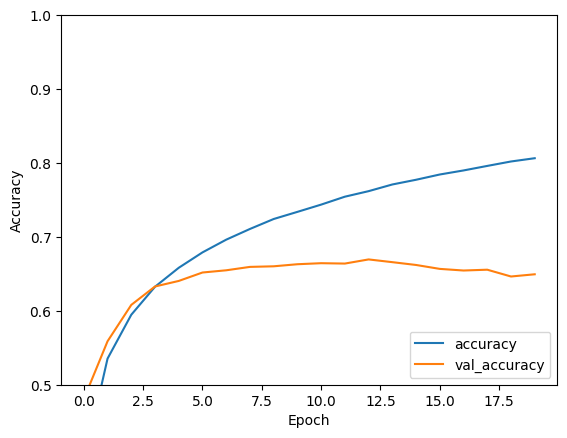

In [ ]:
plt.plot(history_gray.history['accuracy'], label='accuracy')
plt.plot(history_gray.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

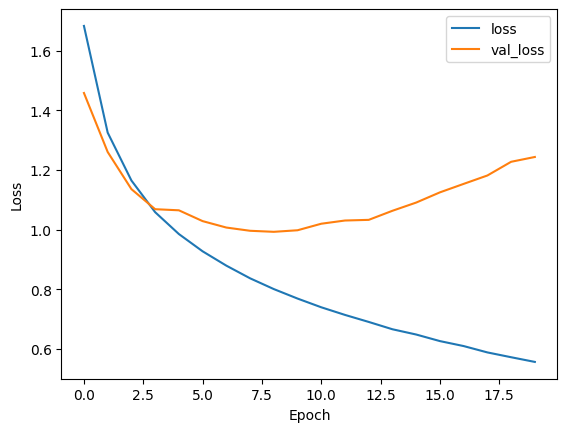

In [ ]:
plt.plot(history_gray.history['loss'], label='loss')
plt.plot(history_gray.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

If we compare the validation accuracy between the model trained on RGB images (Task 1) and the one trained on grayscale images, we see almost no difference. The same can be said about the loss plots, in both models the validation loss starts increasing at around the same number of epochs although the validation loss for the grayscale model decreases more before it increases again compared to the model with RGB images. We can however see that the training loss for the model with RGB images decreases at a more rapid rate than the model with grayscale images and ends at a loss of about 0.4 compared to 0.6. Lastly, we see that the gap between the validation loss and training loss for the model with RGB images is greater than the model with grayscale images. This suggests that the grayscale model is less likely to overfit. Since we removed the color channels, the model is forced to work with less features which reduces the complexity. This leads to improved generalization although not necessarily better performance. From our analysis it is hard to say which model is performing better since both the loss and accuracy plots show similar results.